In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

32


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,56128086f80c7d6fb50fb8f47b3c6afe4814e512,hired-sway,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cok/adapted.txt,cq.txt,manual/cok.json,...,186,71,102.014085,28.718084,56,78.5,101.0,120.00,180,COK
1,dcb1d73223bc1dfaa69c52874a19dc164e90401a,waugh-doit,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,140,72,58.972222,23.177194,24,43.0,54.5,64.25,146,CTE
2,2eb01c138bb230c8019c954a06f756798896ae0a,mural-coth,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,166,77,55.896104,19.466966,19,43.0,54.0,65.00,131,CTE
3,e9722988e8445c907cb98552994cea3b6ce6755f,toxic-halm,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,113,75,51.640000,21.916081,23,39.0,46.0,57.00,140,CTE
4,31df35896055a20b4698600cdcadaa9799b33b0e,wormy-doll,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,126,68,54.941176,19.708989,8,42.0,50.5,62.00,112,CTE


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,sulfa-eyot,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.660000,0.752517,...,190,77,109.298701,28.809294,66,89.00,106.0,123.00,253,COK
1,larky-yawl,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.653333,0.743973,...,224,80,110.337500,28.407943,66,90.75,106.5,125.25,223,COK
2,moony-dees,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.656667,0.745304,...,203,78,108.474359,31.330133,56,87.00,104.5,124.50,206,COK
3,gulfy-myth,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.663333,0.752445,...,182,75,110.493333,29.173467,69,88.00,107.0,127.00,224,COK
4,kacha-plot,0.0,cok/adapted.txt,cq.txt,manual/cok.json,1,1,1,0.690000,0.769042,...,167,73,97.109589,25.280956,56,77.00,94.0,111.00,177,COK


In [5]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
0,COK,cok/adapted.txt,manual/cok.json,0,1,0.0,"(1, 2)"
1,COK,cok/adapted.txt,manual/cok.json,0,1,0.5,"(1, 2)"
2,COK,cok/adapted.txt,manual/cok.json,1,1,0.0,"(1, 2)"
3,COK,cok/adapted.txt,manual/cok.json,1,1,0.5,"(1, 2)"
4,CTE,cte/format-sro-triples-few.txt,manual/cte-triples.json,0,1,0.0,"(1, 2)"
5,CTE,cte/format-sro-triples-few.txt,manual/cte-triples.json,0,1,0.5,"(1, 2)"
6,CTE,cte/format-sro-triples-few.txt,manual/cte-triples.json,1,1,0.0,"(1, 2)"
7,CTE,cte/format-sro-triples-few.txt,manual/cte-triples.json,1,1,0.5,"(1, 2)"
8,CTE,cte/format-triples-ere-few.txt,manual/cte-triples.json,0,1,0.0,"(1, 2)"
9,CTE,cte/format-triples-ere-few.txt,manual/cte-triples.json,0,1,0.5,"(1, 2)"


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['cok/adapted', 'cte/format-sro-triples-few',
       'cte/format-triples-ere-few', 'cte/format-triples-few'],
      dtype=object)

In [ ]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,COK,cok/adapted,manual/cok,0,1,0.0,0.660000,0.752517,0.73,0.824301,...,121.00,224,80,110.337500,28.809294,66,90.75,106.5,125.25,253
1,COK,cok/adapted,manual/cok,0,1,0.5,0.663333,0.752445,0.73,0.830490,...,120.75,203,78,110.493333,31.330133,69,88.00,107.0,127.00,224
2,COK,cok/adapted,manual/cok,1,1,0.0,0.690000,0.769042,0.77,0.841348,...,110.50,167,73,97.109589,25.322982,56,77.00,94.0,112.00,177
3,COK,cok/adapted,manual/cok,1,1,0.5,0.696667,0.776368,0.77,0.842713,...,110.00,186,71,102.014085,28.718084,56,78.50,101.0,120.00,180
4,CTE,cte/format-sro-triples-few,manual/cte-triples,0,1,0.0,0.666667,0.767526,0.74,0.846426,...,61.50,131,73,52.438356,19.832623,20,40.00,49.0,62.00,110


In [33]:
cols_to_display = ["params.qa.technique", "params.qa.system_prompt", "params.qa.n_shot", "params.qa.temperature"] + metric_cols[:2]

In [34]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df[cols_to_display]

,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
11,CTE,cte/format-triples-ere-few,1,0.5,0.716667,0.785496
3,COK,cok/adapted,1,0.5,0.696667,0.776368


In [35]:
for n_shot in avg_df["params.qa.n_shot"].unique():
    mask = df["params.qa.n_shot"] == n_shot
    display(df[mask][cols_to_display].sort_values("metrics.f1", ascending=False))
    print('='*120)

,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
17,CTE,cte/format-triples-ere-few,0,0.0,0.686667,0.778655
16,CTE,cte/format-triples-ere-few,0,0.0,0.676667,0.773580
9,CTE,cte/format-sro-triples-few,0,0.0,0.663333,0.767526
8,CTE,cte/format-sro-triples-few,0,0.0,0.666667,0.766892
24,CTE,cte/format-triples-few,0,0.0,0.656667,0.765063
25,CTE,cte/format-triples-few,0,0.0,0.653333,0.763194
11,CTE,cte/format-sro-triples-few,0,0.5,0.670000,0.760761
10,CTE,cte/format-sro-triples-few,0,0.5,0.670000,0.760627
27,CTE,cte/format-triples-few,0,0.5,0.653333,0.759180
18,CTE,cte/format-triples-ere-few,0,0.5,0.666667,0.758617


,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
23,CTE,cte/format-triples-ere-few,1,0.5,0.716667,0.785496
28,CTE,cte/format-triples-few,1,0.0,0.696667,0.785462
15,CTE,cte/format-sro-triples-few,1,0.5,0.700000,0.784490
22,CTE,cte/format-triples-ere-few,1,0.5,0.690000,0.783397
14,CTE,cte/format-sro-triples-few,1,0.5,0.703333,0.782006
29,CTE,cte/format-triples-few,1,0.0,0.693333,0.781908
13,CTE,cte/format-sro-triples-few,1,0.0,0.696667,0.781443
12,CTE,cte/format-sro-triples-few,1,0.0,0.700000,0.781304
30,CTE,cte/format-triples-few,1,0.5,0.700000,0.778342
7,COK,cok/adapted,1,0.5,0.693333,0.776368


## Visualizations

In [11]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [12]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.ylim(0, 1)
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [13]:
def plot_variance_grid(dataf, x='temperature', y='f1', hue='prompt', figsize=(6, 4), legend='auto', legend_loc='lower left'):
    techniques = dataf['technique'].unique()
    n = len(techniques)
    n_cols = 2
    n_rows = (n + 1) // n_cols  # Calculate the number of rows needed for nx2 grid
    figsize = (figsize[0] * n_cols, figsize[1] * n_rows)  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, technique in enumerate(techniques):
        ax = axes[i]
        subset = dataf[dataf['technique'] == technique]
        sns.lineplot(x=x, y=y, hue=hue, data=subset, linewidth=2.5, legend=False, ax=ax)
        ax.set_title(technique)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [14]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
0,COK,cok/adapted,manual/cok,0,1,0.0,1,0.660000,0.752517,cok/adapted | 0
1,COK,cok/adapted,manual/cok,0,1,0.0,2,0.653333,0.743973,cok/adapted | 0
2,COK,cok/adapted,manual/cok,0,1,0.5,1,0.656667,0.745304,cok/adapted | 0
3,COK,cok/adapted,manual/cok,0,1,0.5,2,0.663333,0.752445,cok/adapted | 0
4,COK,cok/adapted,manual/cok,1,1,0.0,1,0.690000,0.769042,cok/adapted | 1
5,COK,cok/adapted,manual/cok,1,1,0.0,2,0.690000,0.769042,cok/adapted | 1
6,COK,cok/adapted,manual/cok,1,1,0.5,1,0.696667,0.775941,cok/adapted | 1
7,COK,cok/adapted,manual/cok,1,1,0.5,2,0.693333,0.776368,cok/adapted | 1
8,CTE,cte/format-sro-triples-few,manual/cte-triples,0,1,0.0,1,0.666667,0.766892,cte/format-sro-triples-few | 0
9,CTE,cte/format-sro-triples-few,manual/cte-triples,0,1,0.0,2,0.663333,0.767526,cte/format-sro-triples-few | 0


In [15]:
mask = prepared_df['n_shot'] == 1

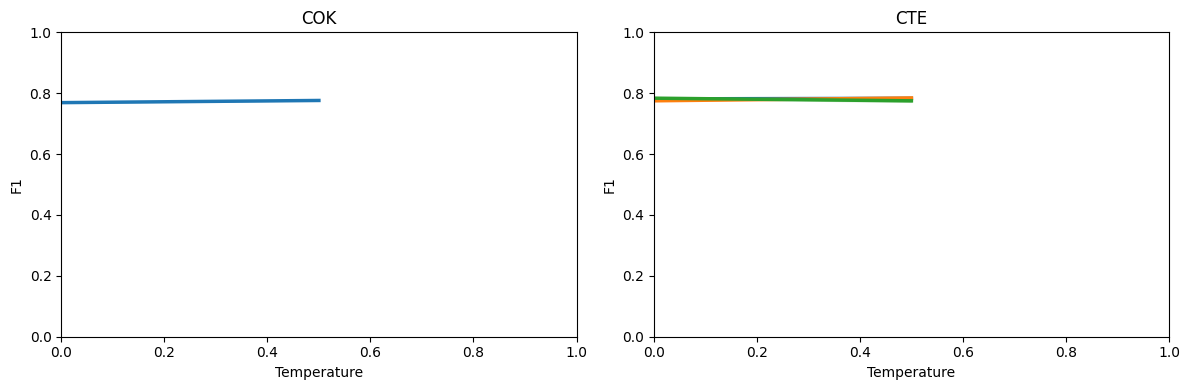

In [16]:
plot_variance_grid(prepared_df.loc[mask], x='temperature', y='f1', hue='prompt', legend_loc='upper left')

/tmp/ipykernel_133836/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


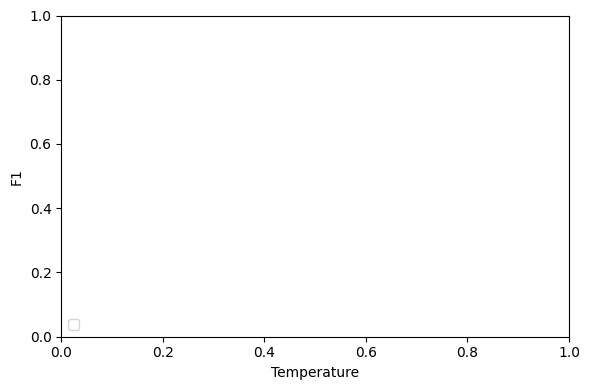

/tmp/ipykernel_133836/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


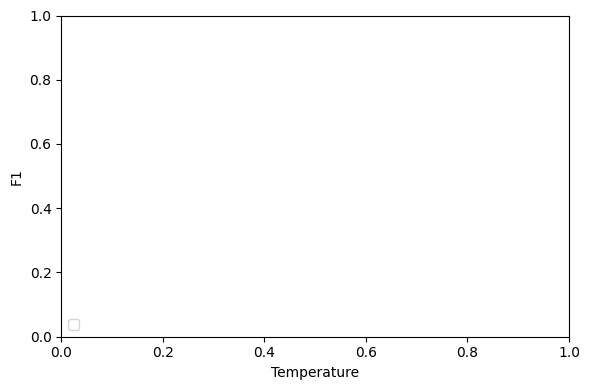

In [17]:
for technique in prepared_df['technique'].unique():
    plot_variance(prepared_df, technique='DIRECT', legend='brief', figsize=(6, 4))

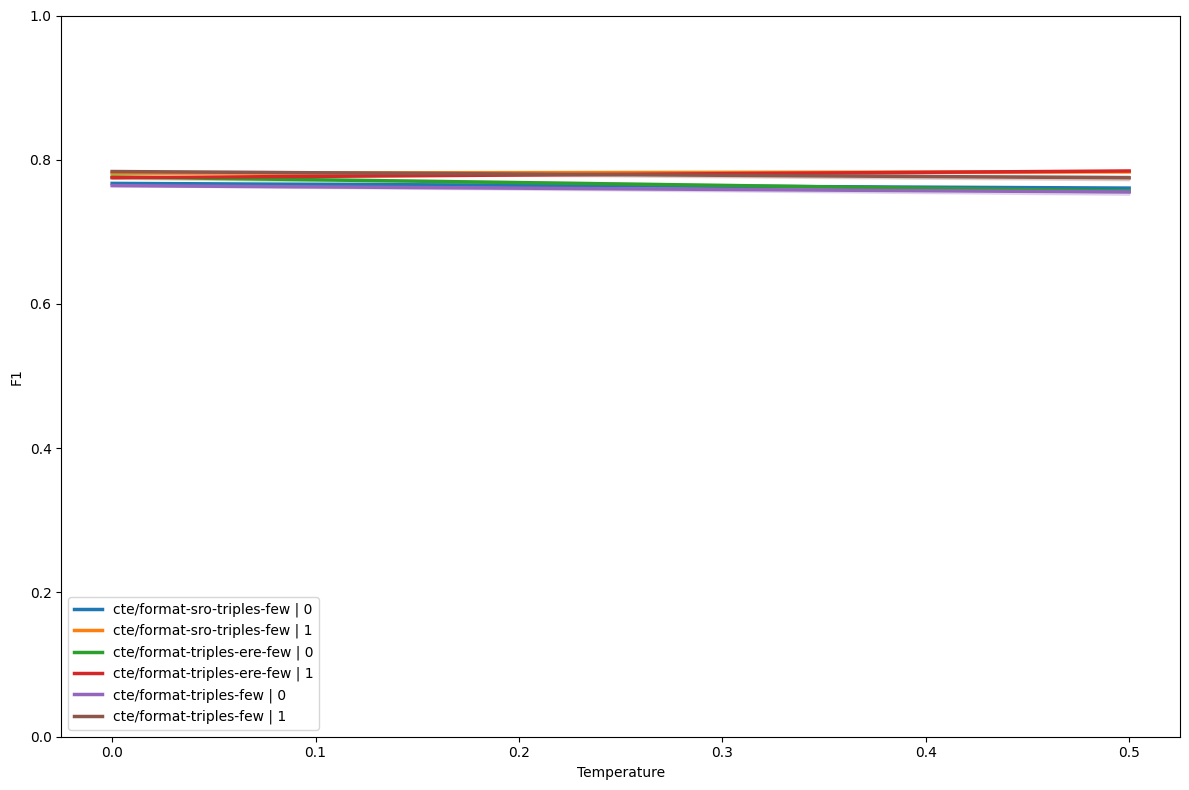

In [18]:
plot_variance(prepared_df, technique='CTE', legend='brief')

/tmp/ipykernel_133836/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


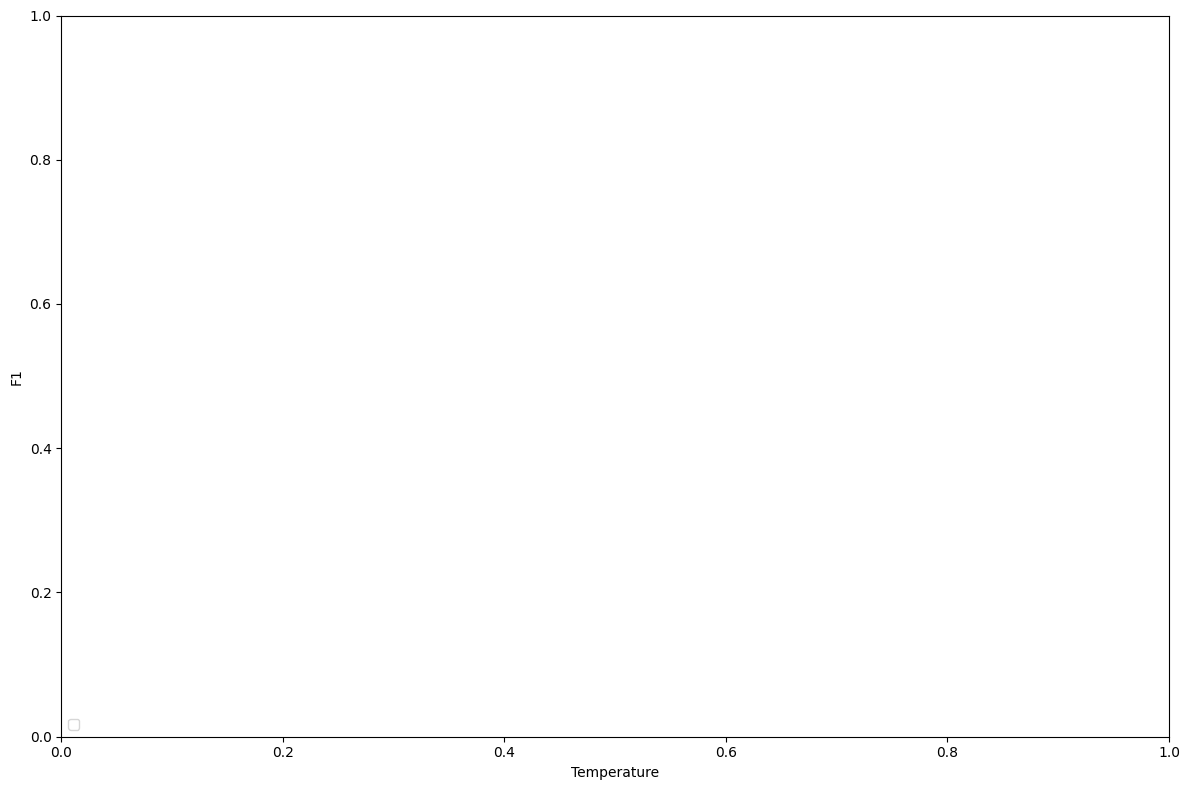

In [19]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [20]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
4,COK,cok/adapted,manual/cok,1,1,0.0,1,0.690000,0.769042,cok/adapted | 1
5,COK,cok/adapted,manual/cok,1,1,0.0,2,0.690000,0.769042,cok/adapted | 1
6,COK,cok/adapted,manual/cok,1,1,0.5,1,0.696667,0.775941,cok/adapted | 1
7,COK,cok/adapted,manual/cok,1,1,0.5,2,0.693333,0.776368,cok/adapted | 1
20,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.0,1,0.703333,0.775201,cte/format-triples-ere-few | 1
21,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.0,2,0.706667,0.774905,cte/format-triples-ere-few | 1
22,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,1,0.690000,0.783397,cte/format-triples-ere-few | 1
23,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,2,0.716667,0.785496,cte/format-triples-ere-few | 1


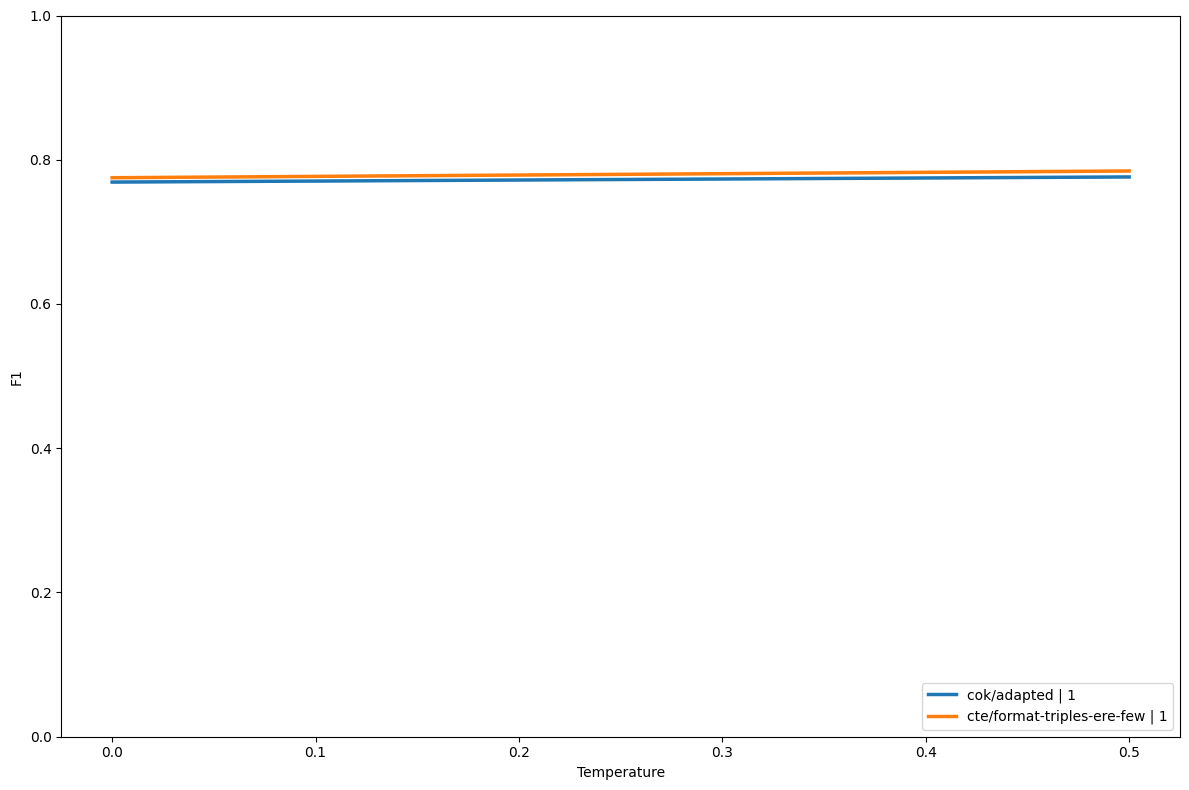

In [21]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

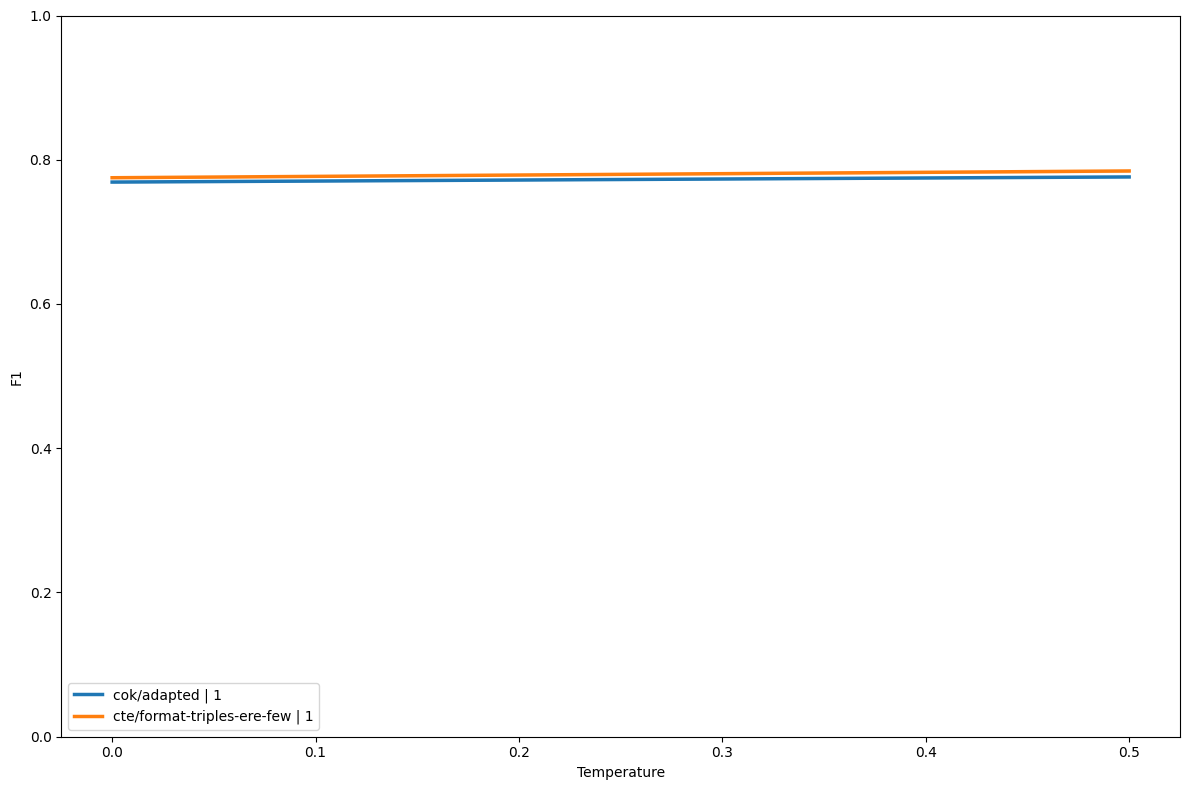

In [22]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

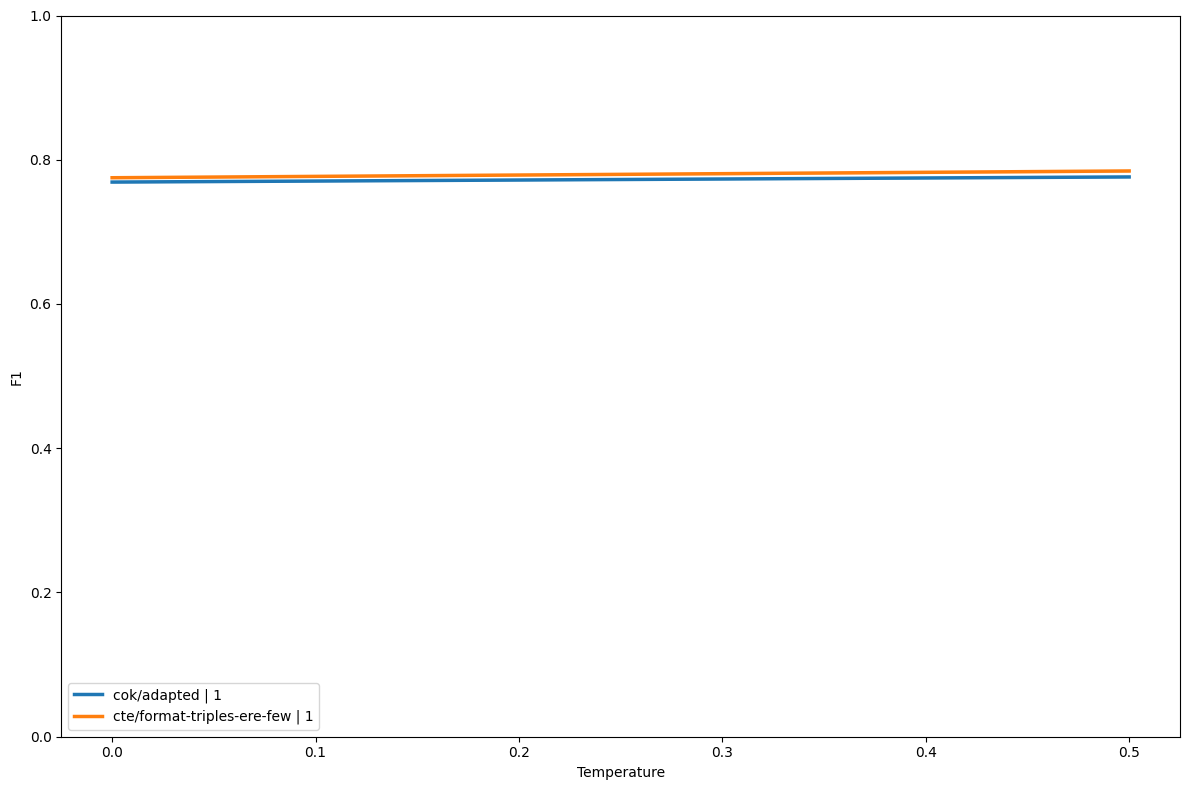

In [23]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

/tmp/ipykernel_133836/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


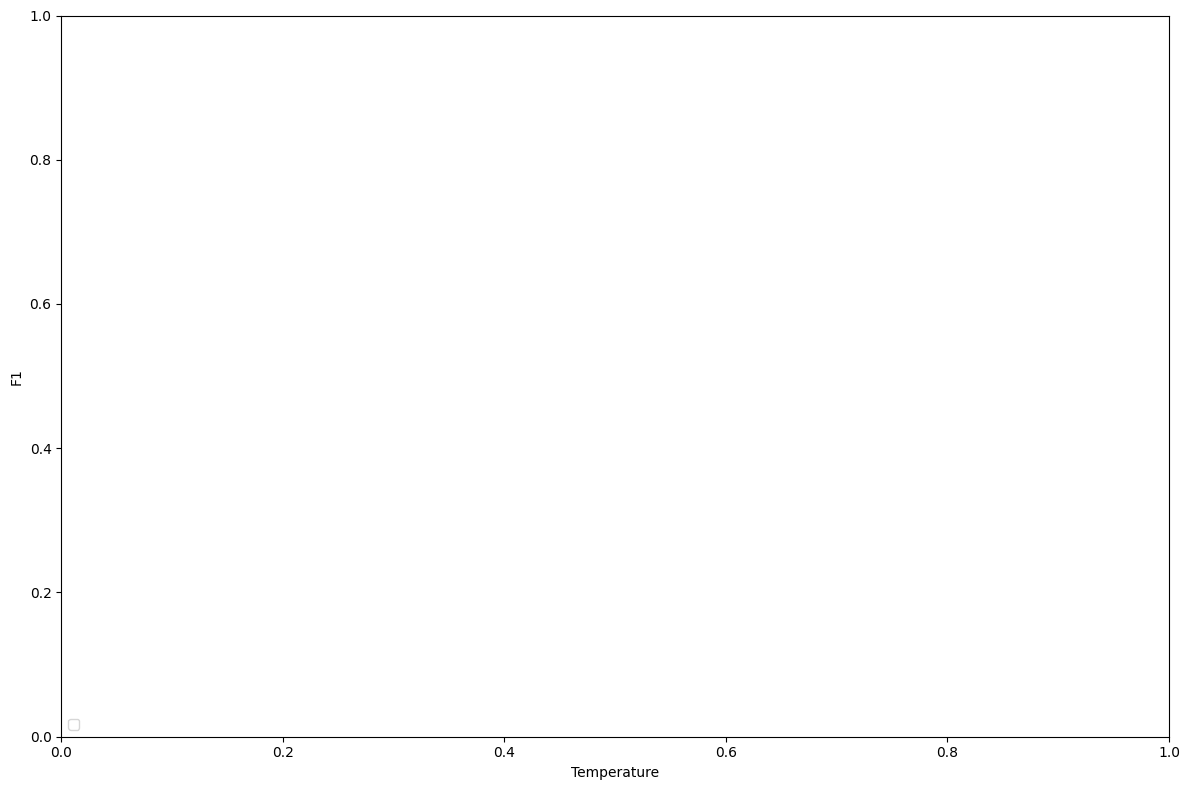

In [24]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

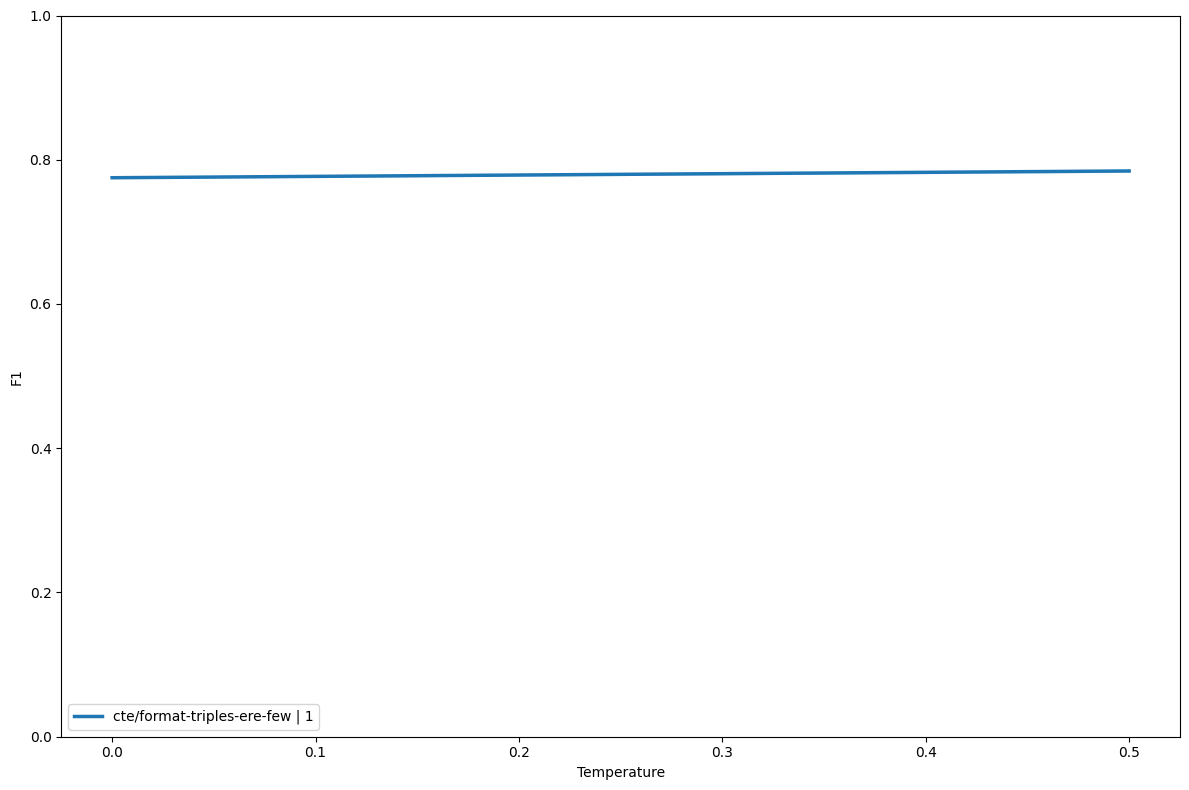

In [ ]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [26]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

/tmp/ipykernel_133836/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


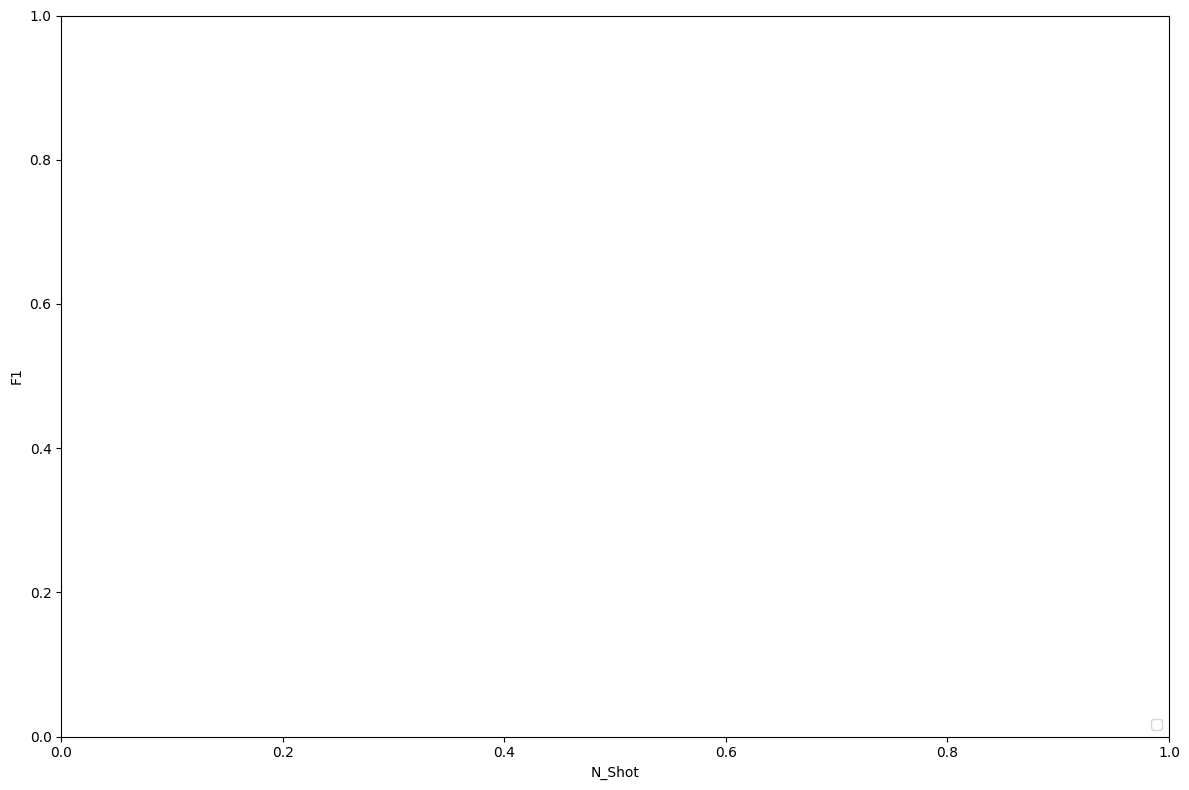

In [27]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

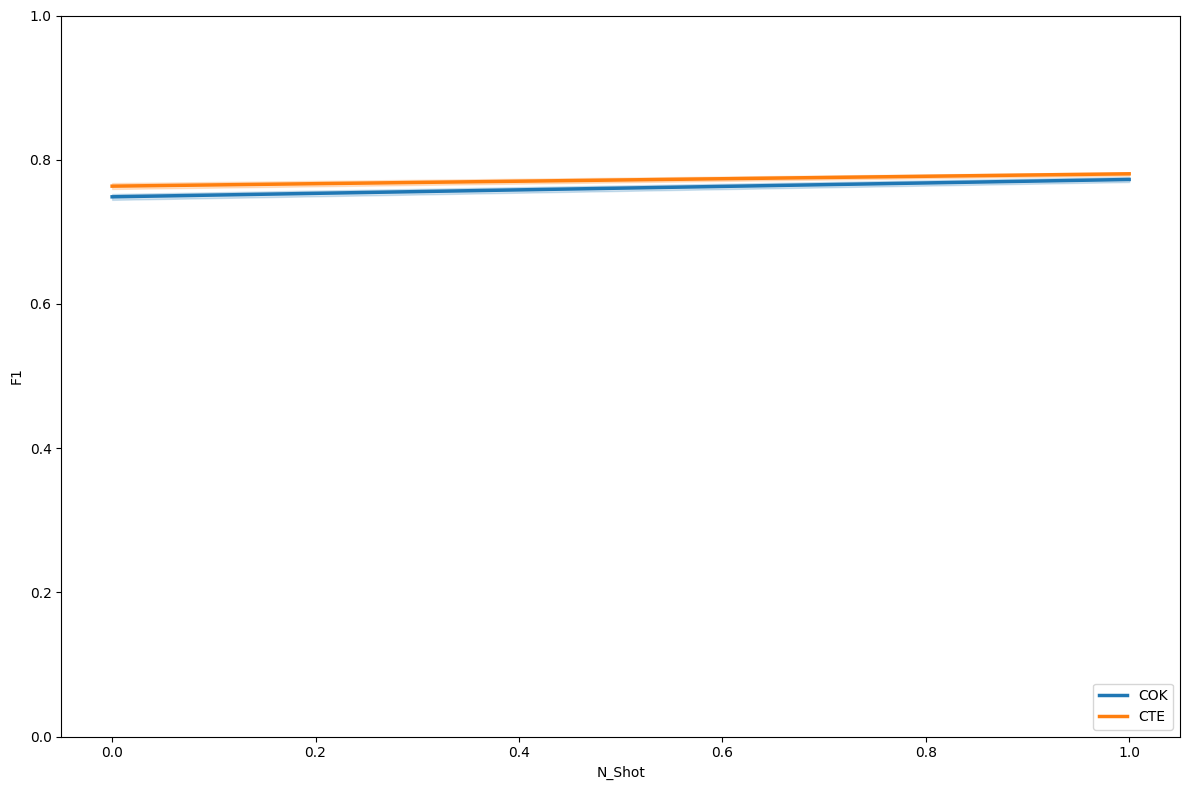

In [28]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [29]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,sulfa-eyot,0.0,cok/adapted,cq,manual/cok,0,1,1,0.660000,0.752517,...,190,77,109.298701,28.809294,66,89.00,106.0,123.00,253,COK
1,larky-yawl,0.0,cok/adapted,cq,manual/cok,0,1,2,0.653333,0.743973,...,224,80,110.337500,28.407943,66,90.75,106.5,125.25,223,COK
2,moony-dees,0.5,cok/adapted,cq,manual/cok,0,1,1,0.656667,0.745304,...,203,78,108.474359,31.330133,56,87.00,104.5,124.50,206,COK
3,gulfy-myth,0.5,cok/adapted,cq,manual/cok,0,1,2,0.663333,0.752445,...,182,75,110.493333,29.173467,69,88.00,107.0,127.00,224,COK
4,kacha-plot,0.0,cok/adapted,cq,manual/cok,1,1,1,0.690000,0.769042,...,167,73,97.109589,25.280956,56,77.00,94.0,111.00,177,COK
5,whity-site,0.0,cok/adapted,cq,manual/cok,1,1,2,0.690000,0.769042,...,167,73,96.493151,25.322982,56,77.00,92.0,112.00,163,COK
6,hired-sway,0.5,cok/adapted,cq,manual/cok,1,1,1,0.696667,0.775941,...,186,71,102.014085,28.718084,56,78.50,101.0,120.00,180,COK
7,flawy-bang,0.5,cok/adapted,cq,manual/cok,1,1,2,0.693333,0.776368,...,166,69,98.086957,24.521743,56,77.00,97.0,116.00,164,COK
8,noted-cows,0.0,cte/format-sro-triples-few,cq,manual/cte-triples,0,1,1,0.666667,0.766892,...,131,73,52.301370,19.684092,20,40.00,49.0,62.00,110,CTE
9,muddy-rail,0.0,cte/format-sro-triples-few,cq,manual/cte-triples,0,1,2,0.663333,0.767526,...,131,73,52.438356,19.832623,20,40.00,49.0,61.00,110,CTE


In [30]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
